<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/PythonProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load datasets
fielding_stats = pd.read_csv('/content/fielding_stats_for_icc_mens_t20_world_cup_2024.csv')
wk_stats = pd.read_csv('/content/wk_stats_for_icc_mens_t20_world_cup_2024.csv')
batting_stats = pd.read_csv('/content/batting_stats_for_icc_mens_t20_world_cup_2024.csv')
match_results = pd.read_csv('/content/match_results_for_icc_mens_t20_world_cup_2024.csv')
bowling_stats = pd.read_csv('/content/fielding_stats_for_icc_mens_t20_world_cup_2024.csv')

In [ ]:
fielding_stats.head(1)


,Player,Team,Mat,Inns,Ct,Max,Ct/Inn
0,AK Markram,SA,9,9,8,4,0.888


In [ ]:
wk_stats.head(1)

,Player,Team,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,RR Pant,India,8,8,14,13,1,3,1.75


In [ ]:
batting_stats.head(1)

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.5,25.0,0,0,1


In [ ]:
match_results.head(1)

,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,United States of America,Canada,United States of America,7 wickets,Dallas,6/1/2024


In [ ]:
bowling_stats.head(1)


,Player,Team,Mat,Inns,Ct,Max,Ct/Inn
0,AK Markram,SA,9,9,8,4,0.888


In [ ]:
# Display the first few rows of each dataset
display(fielding_stats.head())
display(wk_stats.head())
display(batting_stats.head())
display(match_results.head())
display(bowling_stats.head())

,Player,Team,Mat,Inns,Ct,Max,Ct/Inn
0,AK Markram,SA,9,9,8,4,0.888
1,GJ Maxwell,AUS,7,7,7,4,1.000
2,HC Brook,ENG,8,8,7,2,0.875
3,T Stubbs,SA,9,9,7,2,0.777
4,Tanzim Hasan Sakib,BAN,7,7,6,2,0.857


,Player,Team,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,RR Pant,India,8,8,14,13,1,3,1.750
1,Litton Das,Bangladesh,7,7,8,4,4,2,1.142
2,N Pooran,West Indies,7,7,8,8,0,2,1.142
3,Q de Kock,South africa,9,9,8,6,2,1,0.888
4,JC Buttler,England,8,8,7,5,2,2,0.875


,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.5,25.00,0,0,1
1,Aaron Jones,United States of America,6,6,2,162,94*,40.5,135.00,0,1,1
2,Aasif Sheikh,Nepal,3,3,0,63,42,21.0,88.73,0,0,0
3,Abbas Afridi,Pakistan,1,1,0,17,17,17.0,80.95,0,0,0
4,F Achelam,Uganda,1,1,0,9,9,9.0,69.23,0,0,0


,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,United States of America,Canada,United States of America,7 wickets,Dallas,6/1/2024
1,West Indies,Papua New Guinea,West Indies,5 wickets,Providence,6/2/2024
2,Namibia,Oman,tied,-,Bridgetown,6/2/2024
3,South Africa,Sri Lanka,South Africa,6 wickets,New York,6/3/2024
4,Afghanistan,Uganda,Afghanistan,125 runs,Providence,6/3/2024


,Player,Team,Mat,Inns,Ct,Max,Ct/Inn
0,AK Markram,SA,9,9,8,4,0.888
1,GJ Maxwell,AUS,7,7,7,4,1.000
2,HC Brook,ENG,8,8,7,2,0.875
3,T Stubbs,SA,9,9,7,2,0.777
4,Tanzim Hasan Sakib,BAN,7,7,6,2,0.857


In [ ]:
# Convert 'Match Date' to datetime format
match_results['Match Date'] = pd.to_datetime(match_results['Match Date'])

In [ ]:
fielding_stats.shape

(100, 7)

In [ ]:
batting_stats.shape

(247, 12)

In [ ]:
wk_stats.shape

(23, 9)

In [ ]:
bowling_stats.shape

(100, 7)

In [ ]:
merge_df=pd.merge(fielding_stats,bowling_stats,on='Player')

In [ ]:
merge_df

,Player,Team_x,Mat_x,Inns_x,Ct_x,Max_x,Ct/Inn_x,Team_y,Mat_y,Inns_y,Ct_y,Max_y,Ct/Inn_y
0,AK Markram,SA,9,9,8,4,0.888,SA,9,9,8,4,0.888
1,GJ Maxwell,AUS,7,7,7,4,1.000,AUS,7,7,7,4,1.000
2,HC Brook,ENG,8,8,7,2,0.875,ENG,8,8,7,2,0.875
3,T Stubbs,SA,9,9,7,2,0.777,SA,9,9,7,2,0.777
4,Tanzim Hasan Sakib,BAN,7,7,6,2,0.857,BAN,7,7,6,2,0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Junaid Siddiqui,CAN,2,2,1,1,0.500,CAN,2,2,1,1,0.500
96,SI Kamea,PNG,2,2,1,1,0.500,PNG,2,2,1,1,0.500
97,Karan KC,NEP,2,2,1,1,0.500,NEP,2,2,1,1,0.500
98,Milind Kumar,USA,2,2,1,1,0.500,USA,2,2,1,1,0.500


In [ ]:
merge_df.isnull().sum()

Player      0
Team_x      0
Mat_x       0
Inns_x      0
Ct_x        0
Max_x       0
Ct/Inn_x    0
Team_y      0
Mat_y       0
Inns_y      0
Ct_y        0
Max_y       0
Ct/Inn_y    0
dtype: int64

In [ ]:
print(merge_df['Team_y'].dtype)

object


<Axes: xlabel='Team_y'>

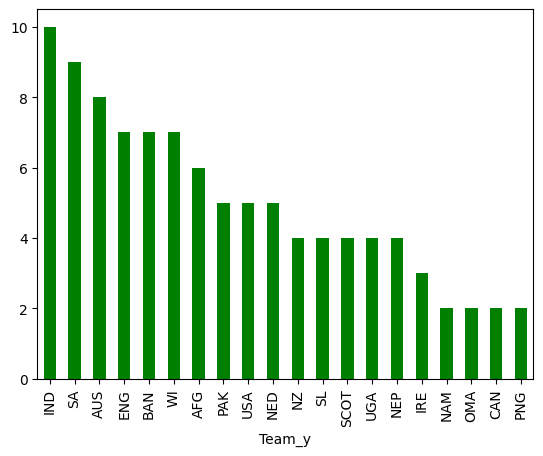

In [ ]:
team_counts = merge_df['Team_y'].value_counts()
team_counts.plot(kind='bar',color='g')

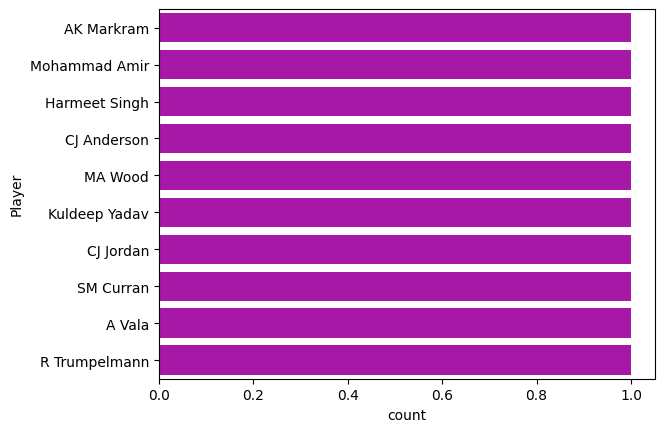

In [ ]:
player_counts = merge_df['Player'].value_counts().head(10)
# Use Seaborn's countplot for plotting counts
sns.countplot(y='Player', data=merge_df, order=player_counts.index, color='m')
plt.show()

<Axes: xlabel='HS'>

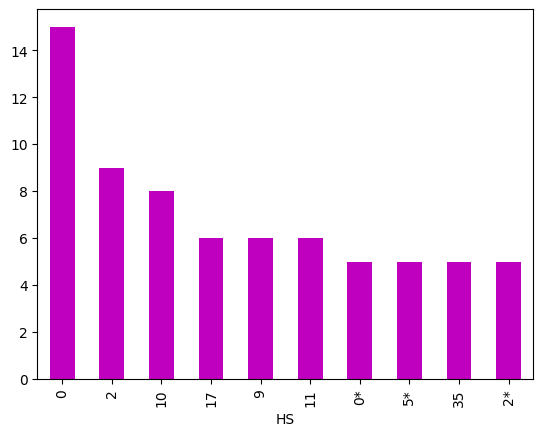

In [ ]:
high_score = batting_stats['HS'].value_counts().head(10)
high_score.plot(kind='bar',color='m')

<ipython-input-66-e2949bd56159>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_high_scores.index, y=player_high_scores.values, palette='viridis')


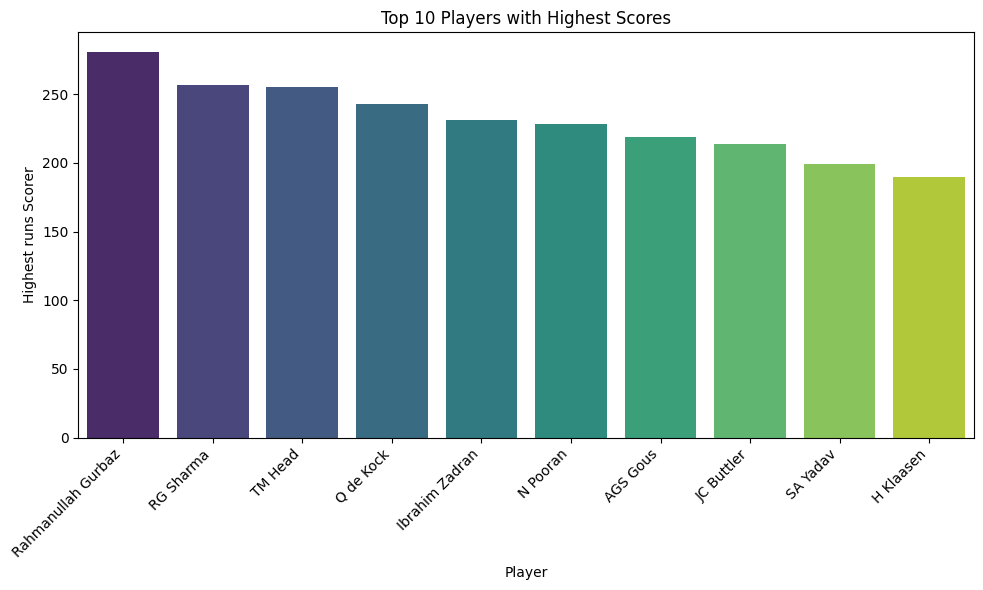

In [ ]:
# prompt: high score with player plot bar

# Group the batting stats by player and get the maximum high score for each player
player_high_scores = batting_stats.groupby('Player')['Runs'].max().sort_values(ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=player_high_scores.index, y=player_high_scores.values, palette='viridis')
plt.xlabel('Player')
plt.ylabel('Highest runs Scorer')
plt.title('Top 10 Players with Highest Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-67-96681f924d6e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_high_scores.index, y=player_high_scores.values, palette='viridis')


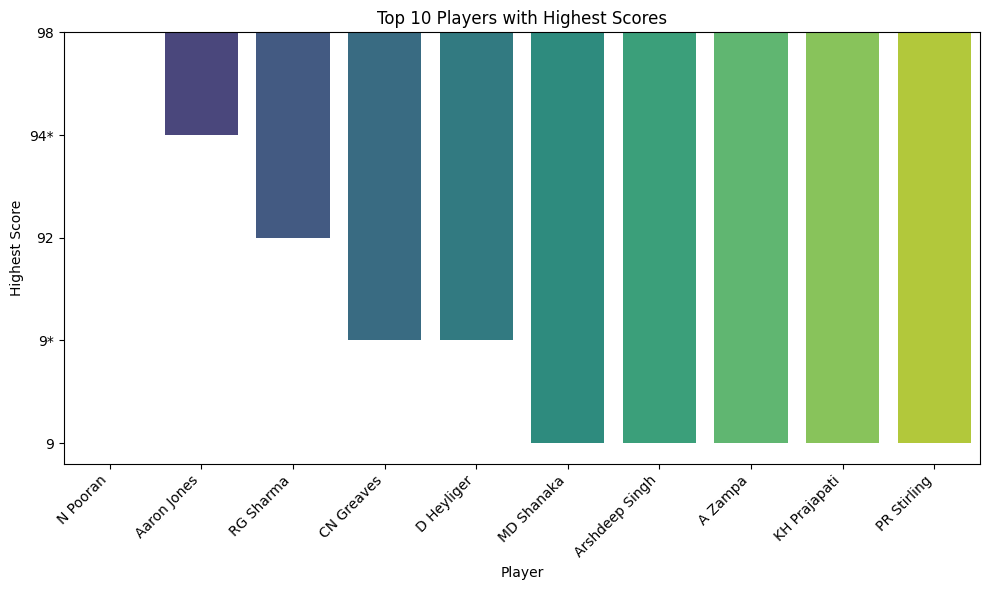

In [ ]:

# Group the batting stats by player and get the maximum high score for each player
player_high_scores = batting_stats.groupby('Player')['HS'].max().sort_values(ascending=False).head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=player_high_scores.index, y=player_high_scores.values, palette='viridis')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.title('Top 10 Players with Highest Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
